<a href="https://colab.research.google.com/github/MNRFKR/TASK-11-HYPOTHESIS-TESTING-IN-PYTHON/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("customer_journey.csv")

df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
print(df['Group'].value_counts())


Group
Control    9604
Test       3115
Name: count, dtype: int64


In [ ]:
print(df.groupby('Group')['TimeOnPage_seconds'].mean())
print(df.groupby('Group')['ItemsInCart'].mean())

print(df.groupby('Group')['Purchased'].mean())


Group
Control    96.638484
Test       99.860995
Name: TimeOnPage_seconds, dtype: float64
Group
Control    1.139525
Test       1.135474
Name: ItemsInCart, dtype: float64
Group
Control    0.401395
Test       0.383628
Name: Purchased, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
successes = df.groupby('Group')['Purchased'].sum()
nobs = df.groupby('Group')['Purchased'].count()

success_control = successes['Control']
success_test = successes['Test']
n_control = nobs['Control']
n_test = nobs['Test']
p_control = success_control / n_control
p_test = success_test / n_test
p_pool = (success_control + success_test) / (n_control + n_test)
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_test))
z = (p_control - p_test) / se
from scipy.stats import norm
pval = 2 * (1 - norm.cdf(abs(z)))

print("Z-statistic:", z)
print("p-value:", pval)

alpha = 0.05
if pval < alpha:
    print("Reject H0: Significant difference")
else:
    print("Fail to reject H0: No significant difference")


Z-statistic: 1.7611500596761331
p-value: 0.0782130080814818
Fail to reject H0: No significant difference


In [ ]:
import pandas as pd
df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
group_metrics = df.groupby('Group').agg({
    'TimeOnPage_seconds': 'mean',
    'ItemsInCart': 'mean',
    'Purchased': 'mean'
})

print(group_metrics)


         TimeOnPage_seconds  ItemsInCart  Purchased
Group                                              
Control           96.638484     1.139525   0.401395
Test              99.860995     1.135474   0.383628


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
time_control = df[df['Group'] == 'Control']['TimeOnPage_seconds']
time_test = df[df['Group'] == 'Test']['TimeOnPage_seconds']
t_stat_time, p_val_time = ttest_ind(time_control, time_test, equal_var=False)

cart_control = df[df['Group'] == 'Control']['ItemsInCart']
cart_test = df[df['Group'] == 'Test']['ItemsInCart']
t_stat_cart, p_val_cart = ttest_ind(cart_control, cart_test, equal_var=False)

print("T-test TimeOnPage: stat =", t_stat_time, "p-value =", p_val_time)
print("T-test ItemsInCart: stat =", t_stat_cart, "p-value =", p_val_cart)
contingency = pd.crosstab(df['Group'], df['Purchased'])
chi2, p_val_chi, dof, expected = chi2_contingency(contingency)

print("Chi-square Conversion: chi2 =", chi2, "p-value =", p_val_chi)


T-test TimeOnPage: stat = -3.2297597297841887 p-value = 0.0012466042292675005
T-test ItemsInCart: stat = 0.11621506193014616 p-value = 0.9074865219763619
Chi-square Conversion: chi2 = 3.0278761218412478 p-value = 0.0818450868158776


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')

time_control = df[df['Group'] == 'Control']['TimeOnPage_seconds']
time_test = df[df['Group'] == 'Test']['TimeOnPage_seconds']
t_stat_time, p_val_time = ttest_ind(time_control, time_test, equal_var=False)

cart_control = df[df['Group'] == 'Control']['ItemsInCart']
cart_test = df[df['Group'] == 'Test']['ItemsInCart']
t_stat_cart, p_val_cart = ttest_ind(cart_control, cart_test, equal_var=False)

contingency = pd.crosstab(df['Group'], df['Purchased'])
chi2, p_val_chi, dof, expected = chi2_contingency(contingency)

print("p-value (TimeOnPage):", p_val_time)
print("p-value (ItemsInCart):", p_val_cart)
print("p-value (Conversion):", p_val_chi)


p-value (TimeOnPage): 0.0012466042292675005
p-value (ItemsInCart): 0.9074865219763619
p-value (Conversion): 0.0818450868158776


In [ ]:
alpha = 0.05
p_val_time = 0.0012466042292675005
p_val_cart = 0.9074865219763619
p_val_conv = 0.0818450868158776

def interpret_result(metric, pval):
    if pval < alpha:
        print(f"{metric}: Significant difference (p = {pval:.4f} < {alpha})")
    else:
        print(f"{metric}: Not significant (p = {pval:.4f} >= {alpha})")

interpret_result("TimeOnPage", p_val_time)
interpret_result("ItemsInCart", p_val_cart)
interpret_result("Conversion", p_val_conv)


TimeOnPage: Significant difference (p = 0.0012 < 0.05)
ItemsInCart: Not significant (p = 0.9075 >= 0.05)
Conversion: Not significant (p = 0.0818 >= 0.05)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
uccesses = df.groupby('Group')['Purchased'].sum()
nobs = df.groupby('Group')['Purchased'].count()
success_control = successes['Control']
success_test = successes['Test']
n_control = nobs['Control']
n_test = nobs['Test']
p_control = success_control / n_control
p_test = success_test / n_test
diff = p_control - p_test
se = np.sqrt((p_control*(1-p_control))/n_control + (p_test*(1-p_test))/n_test)
z_critical = norm.ppf(1 - 0.05/2)  # two-tailed
ci_lower = diff - z_critical * se
ci_upper = diff + z_critical * se

print("Difference in conversion rates:", diff)
print("95% Confidence Interval: (", ci_lower, ",", ci_upper, ")")


Difference in conversion rates: 0.017767643631632912
95% Confidence Interval: ( -0.001922703132474727 , 0.03745799039574055 )


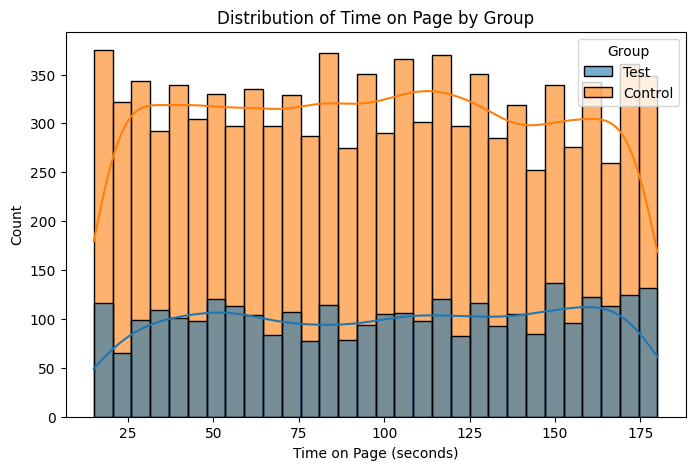

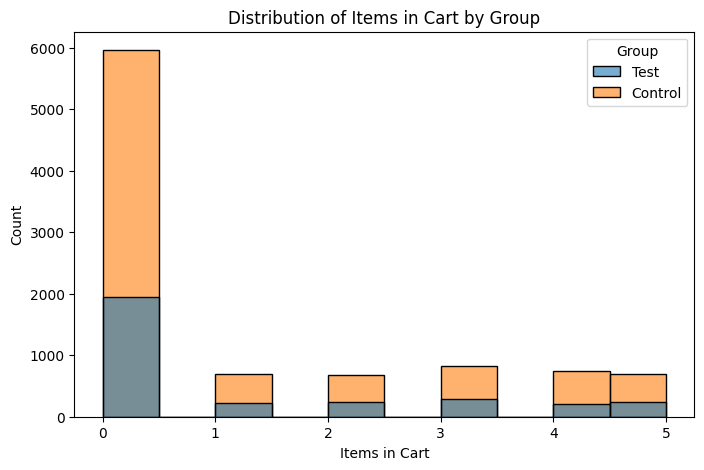

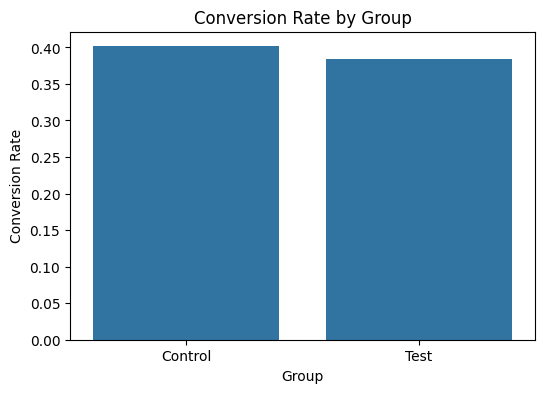

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_journey.csv")
df['Group'] = df['ReferralSource'].apply(lambda x: 'Test' if x == 'Social Media' else 'Control')
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="TimeOnPage_seconds", hue="Group", kde=True, bins=30, alpha=0.6)
plt.title("Distribution of Time on Page by Group")
plt.xlabel("Time on Page (seconds)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="ItemsInCart", hue="Group", kde=False, bins=10, alpha=0.6)
plt.title("Distribution of Items in Cart by Group")
plt.xlabel("Items in Cart")
plt.ylabel("Count")
plt.show()
conversion_rates = df.groupby('Group')['Purchased'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data=conversion_rates, x="Group", y="Purchased")
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()
